In [1]:
import scipy.stats as stats
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Preparacion de los datos
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Librerias para construccion e implementacion de modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

# Evaluar el desempeño del modelo
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

## Evitar advertencias en la ejecucion de modelos
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/Emissions_Canada_CO2.csv")

In [3]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
from os import rename

### Descripcion de las columnas
df.rename(
    columns={
        "Make": "make",
        "Model": "model",
        "Vehicle Class": "vehicle_class",
        "Engine Size(L)": "engine_size",
        "Cylinders": "cylinders",
        "Transmission": "transmission",
        "Fuel Type": "fuel_type",
        "Fuel Consumption City (L/100 km)": "fuel_cons_city",
        "Fuel Consumption Hwy (L/100 km)": "fuel_cons_hwy",
        "Fuel Consumption Comb (L/100 km)": "fuel_cons_comb",
        "Fuel Consumption Comb (mpg)": " fuel_cons_comb_mpg",
        "CO2 Emissions(g/km)": "co2",
    },
    inplace=True,
)

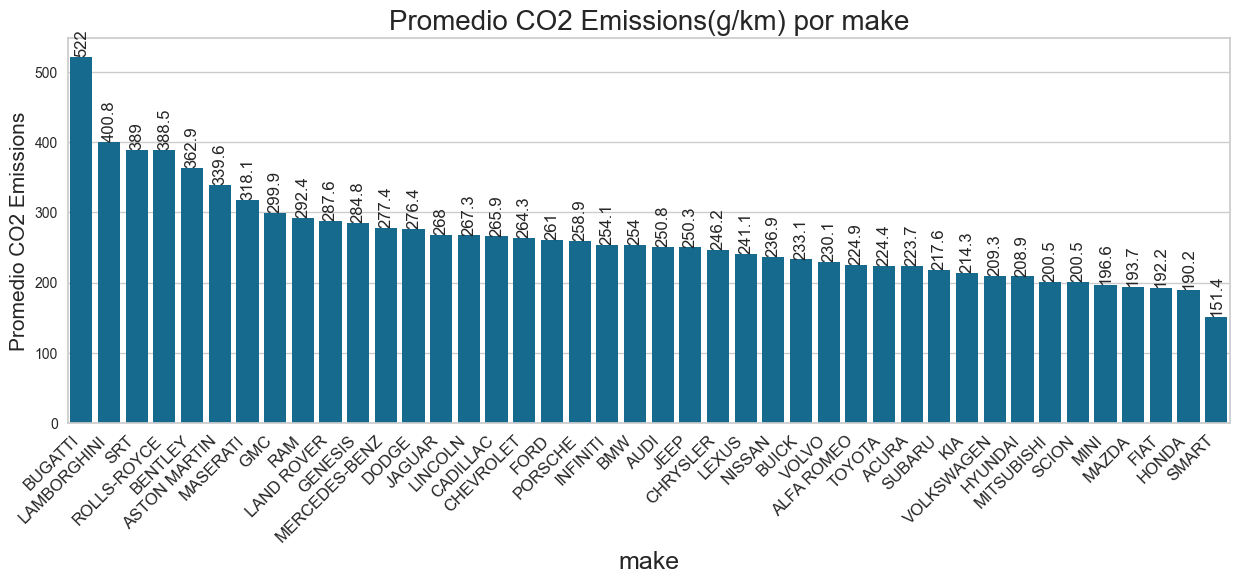

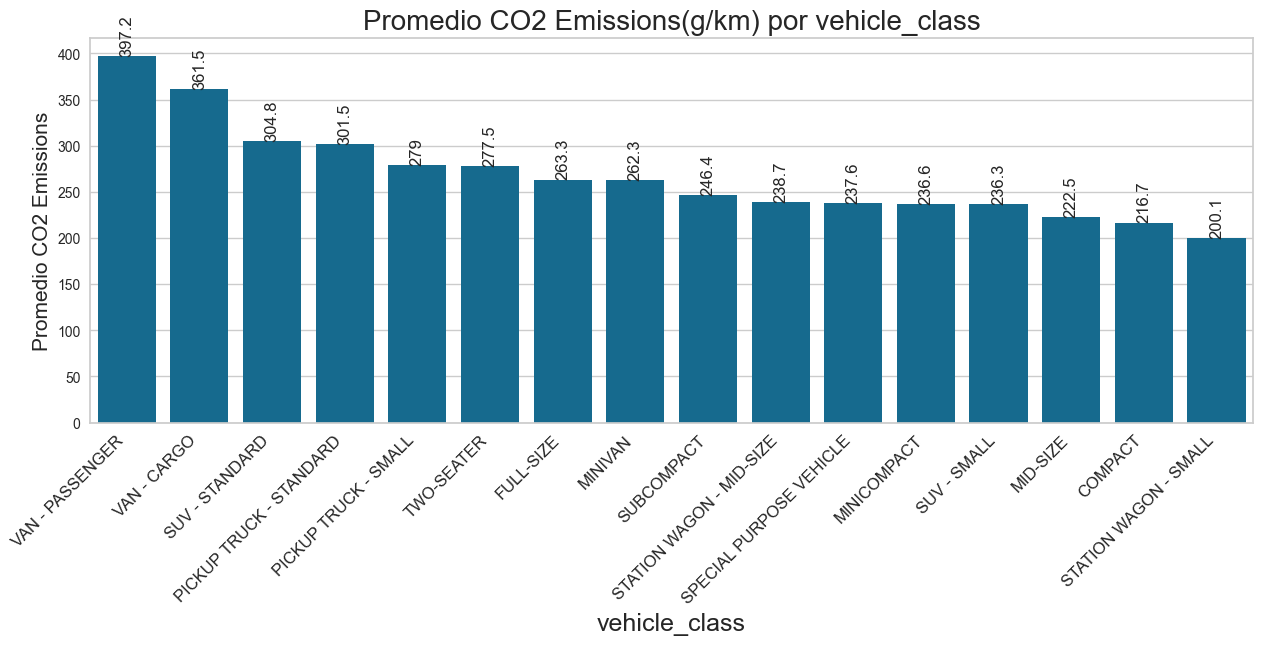

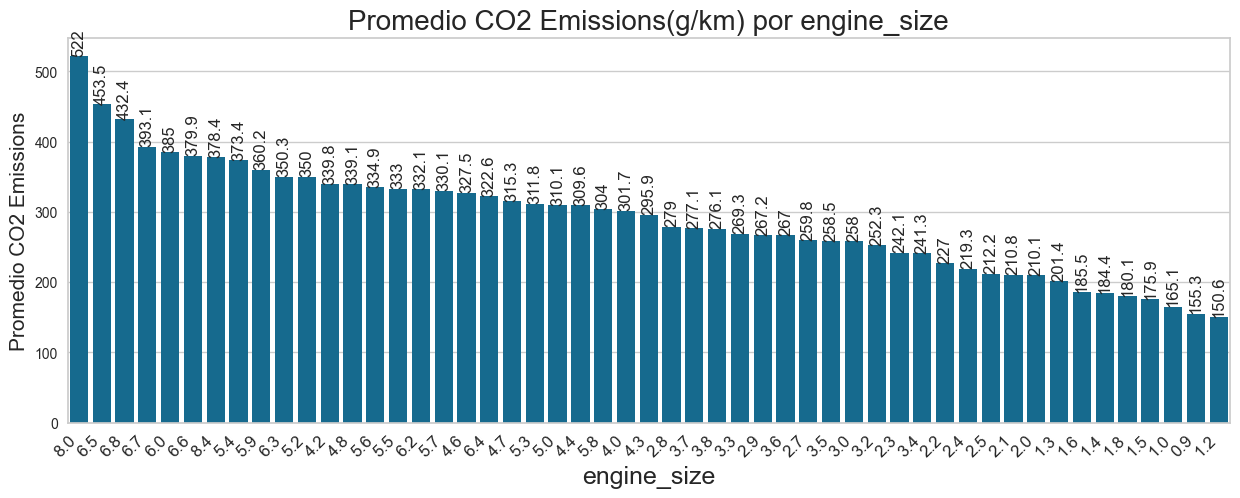

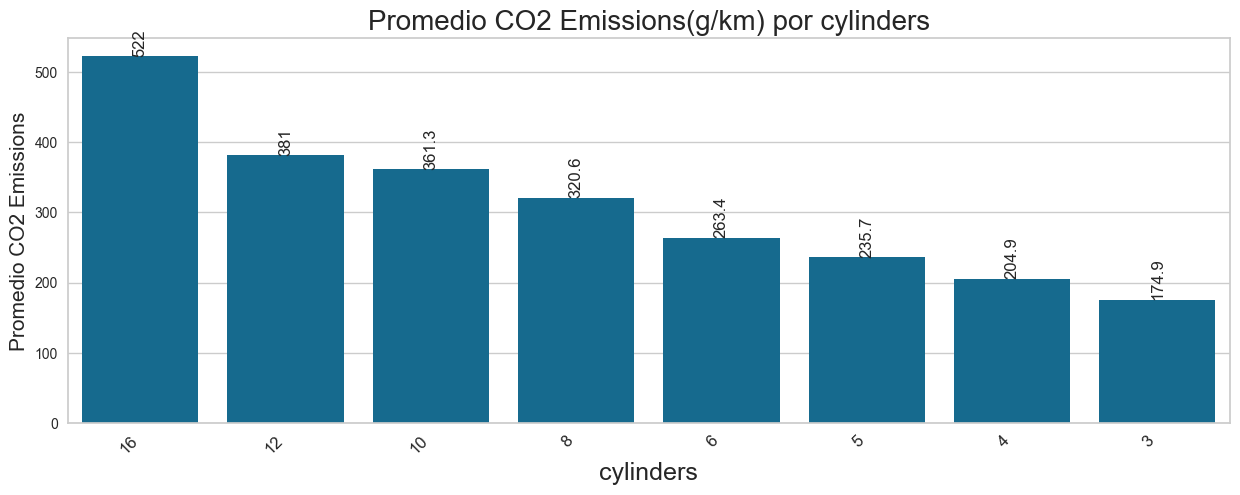

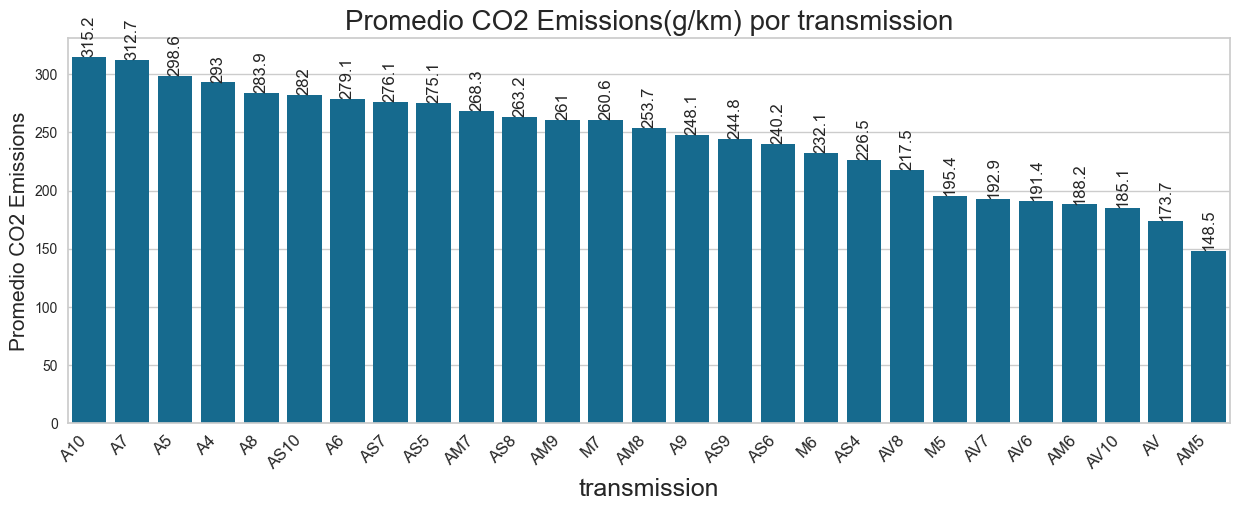

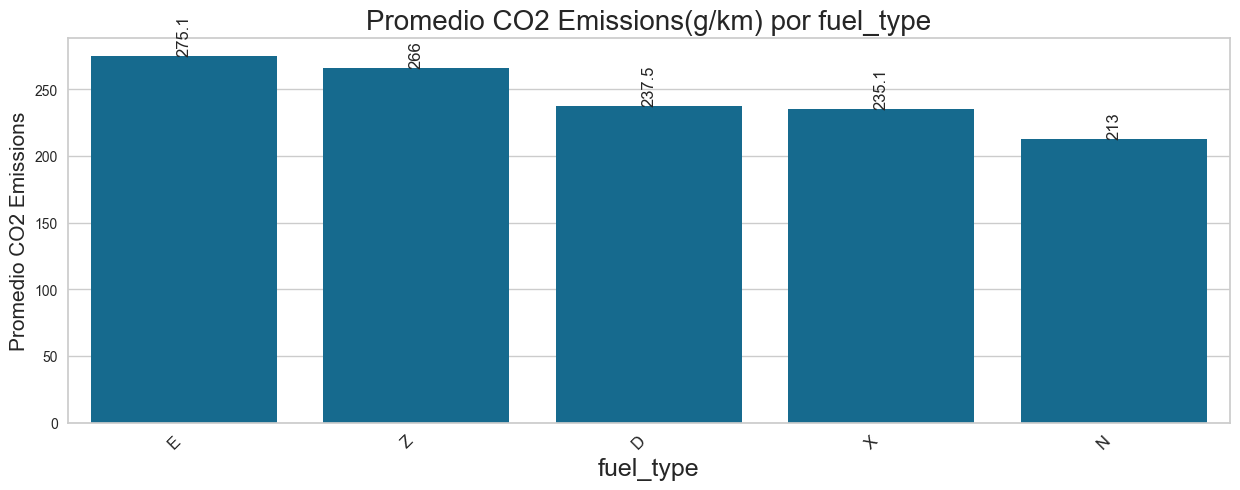

In [ ]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)["co2"].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by="co2", ascending=False)
        ax = sns.barplot(
            x=column,
            y="co2",
            data=grouped_data_sorted,
            order=grouped_data_sorted[column],
        )
        ax.bar_label(ax.containers[0], rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel("Promedio CO2 Emissions", fontsize=15)
        plt.title(f"Promedio CO2 Emissions(g/km) por {column}", fontsize=20)
        plt.xticks(rotation=45, ha="right", fontsize=12)
        plt.show()


cat_features = [
    "make",
    "vehicle_class",
    "engine_size",
    "cylinders",
    "transmission",
    "fuel_type",
]
plot_bar_with_co2(df, cat_features)

## Aplicar Encoding a las caracteristicas categoricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copiar el dataset para evitar modificar el original directamente
df_labeled = df.copy()

# Listar columnas categoricas
categorical_columns = ["make", "model", "vehicle_class", "transmission", "fuel_type"]

# Aplicar Label Encoding a las columnas categoricas
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Mostrar las primeras filas del DataFrame con las columnas codificadas
df_labeled.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,fuel_cons_comb_mpg,co2
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [12]:
# Mostrar info del dataset codificado
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 7385 non-null   int64  
 1   model                7385 non-null   int64  
 2   vehicle_class        7385 non-null   int64  
 3   engine_size          7385 non-null   float64
 4   cylinders            7385 non-null   int64  
 5   transmission         7385 non-null   int64  
 6   fuel_type            7385 non-null   int64  
 7   fuel_cons_city       7385 non-null   float64
 8   fuel_cons_hwy        7385 non-null   float64
 9   fuel_cons_comb       7385 non-null   float64
 10   fuel_cons_comb_mpg  7385 non-null   int64  
 11  co2                  7385 non-null   int64  
dtypes: float64(4), int64(8)
memory usage: 692.5 KB


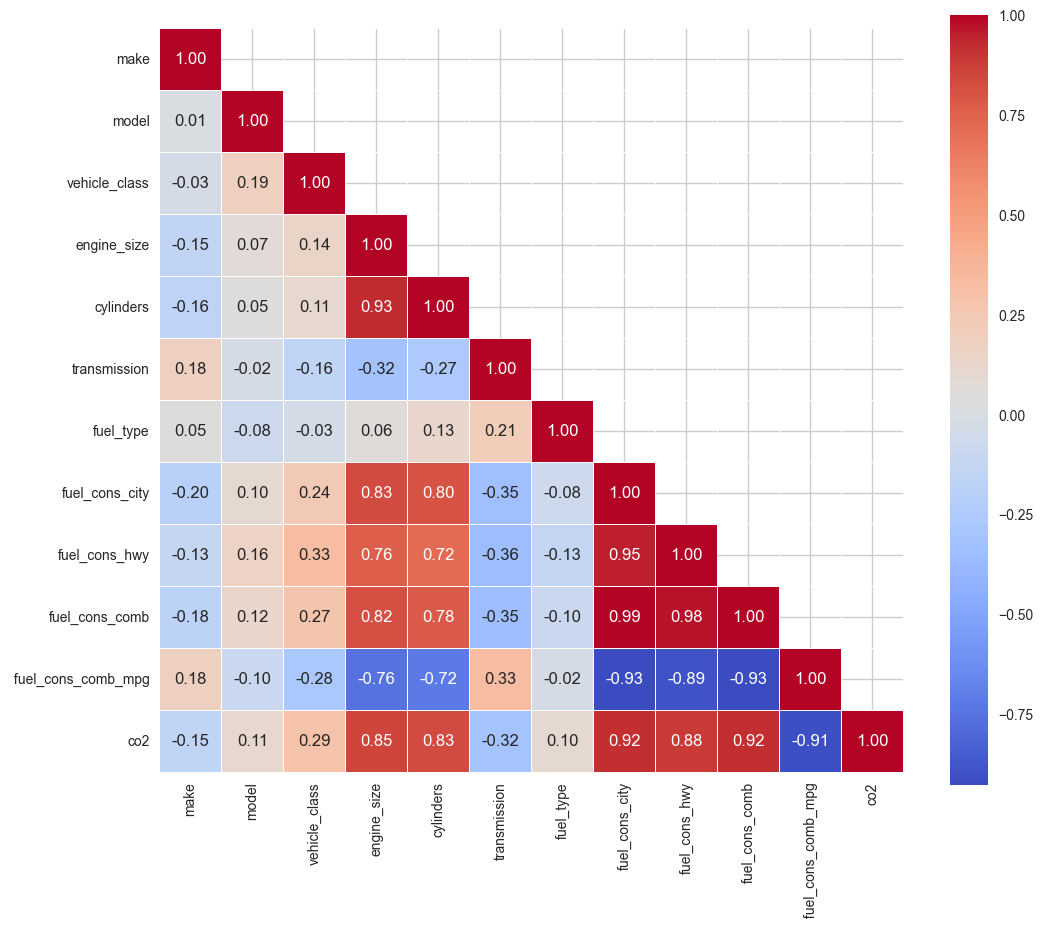

In [20]:
# Matriz de correlacion
correlation_matrix = df_labeled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    mask=np.triu(correlation_matrix, k=1),
)
plt.show()

**Observaciones:**
- La matriz de correlacion muestra caracteristicas como el tamaño del motor, los cilindros y las metricas de consumo de combustible (ciudad, carretera, combinado) tienen fuertes correlaciones positivas con las emisiones de co2.
- En particular, fuel_cons_comb_mpg tiene una fuerte correlacion negativa con las emisiones de CO2, lo que indica que una mayor eficiencia de combustible da como resultado menores emisiones.
- Desde una perspectiva de multicolineaidad, el consumo de combustible en ciudad, carretera y combinado estan altamente intercorrelacionados, lo que sugiere una posible redundancia.

## Tratamiento para las caracteristicas numericas

### Distribucion para las caracteristicas numericas

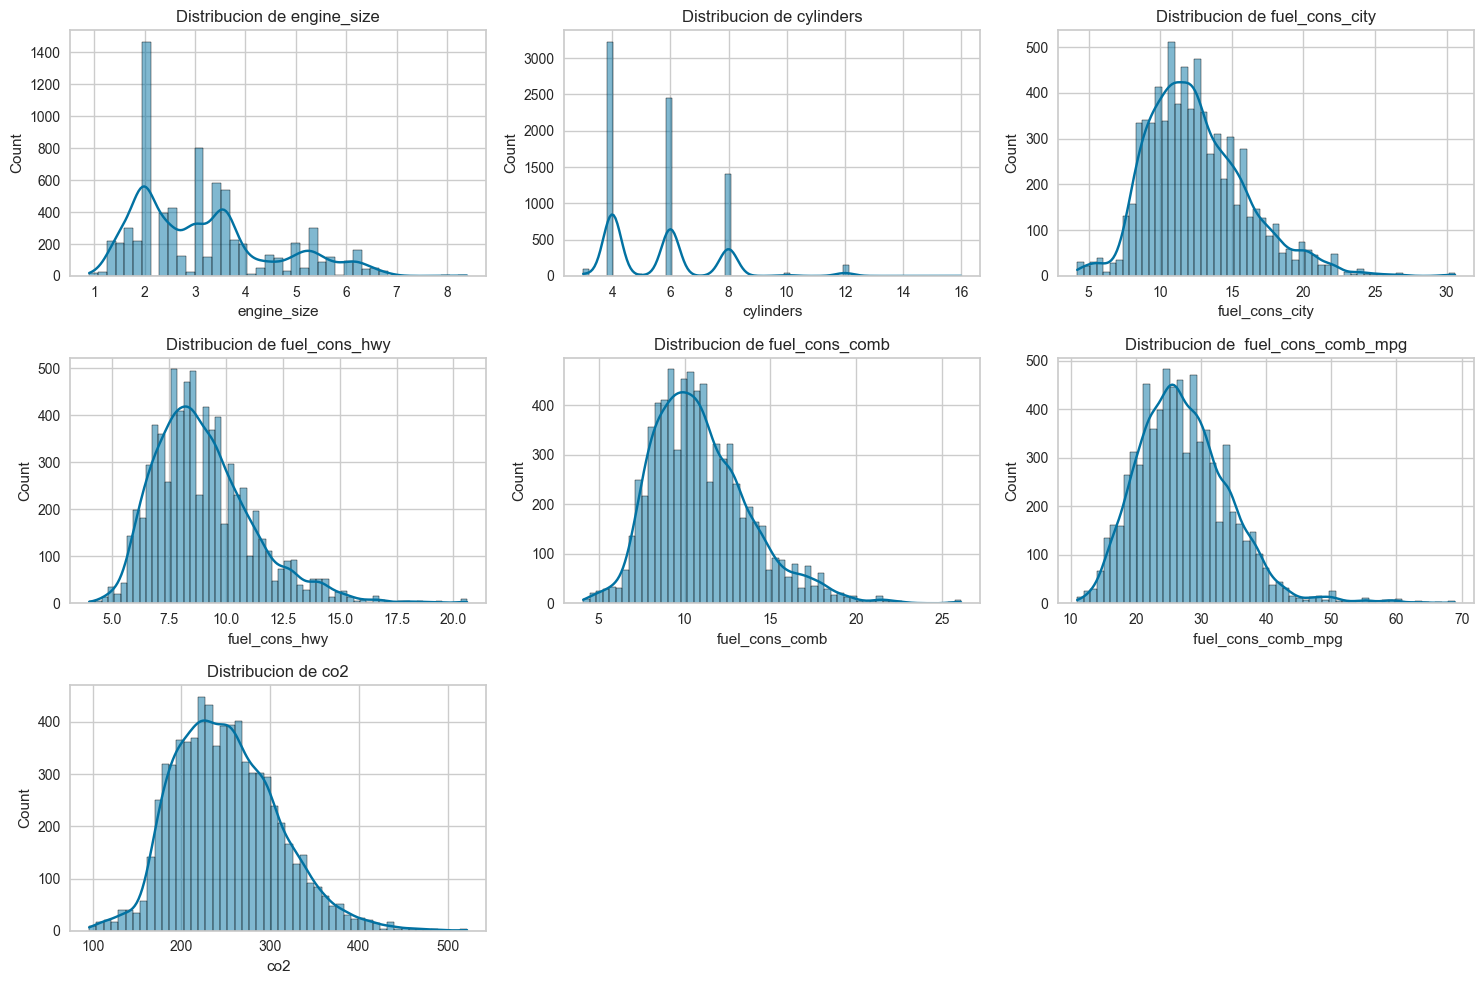

In [ ]:
numerical_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(15, 10))
num_vars = len(numerical_df.columns)
for i, var in enumerate(numerical_df.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f"Distribucion de {var}")

plt.tight_layout()
plt.show()

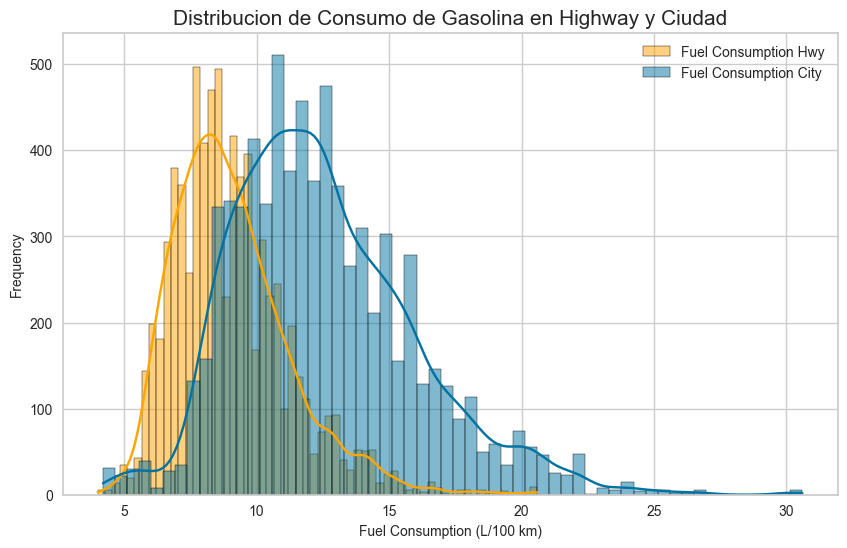

In [ ]:
# Consumo de gasolina en el highway con relacion al total de gasolina consumido en la ciudad
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df, x="fuel_cons_hwy", kde=True, label="Fuel Consumption Hwy", color="orange"
)
sns.histplot(data=df, x="fuel_cons_city", kde=True, label="Fuel Consumption City")
plt.xlabel("Fuel Consumption (L/100 km)", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Distribucion de Consumo de Gasolina en Highway y Ciudad", fontsize=15)
plt.legend()
plt.show()

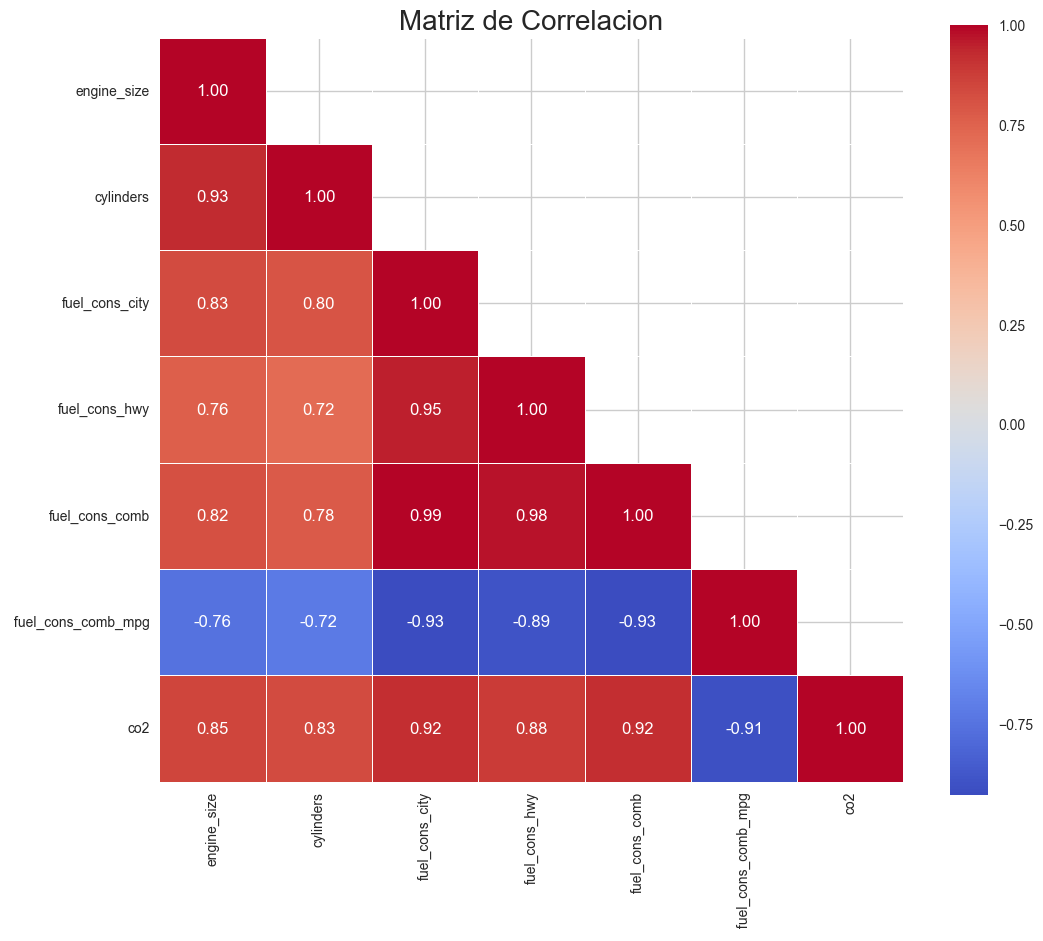

In [25]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    mask=np.triu(correlation_matrix, k=1),
)
plt.title("Matriz de Correlacion", fontsize=20)
plt.show()

## Formas de visualizar las correlaciones entre las variables independientes y dependientes

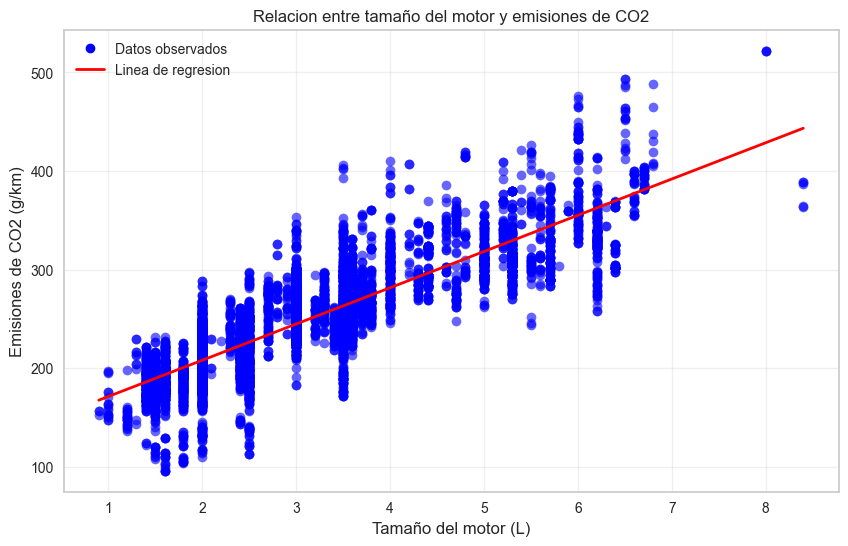

In [27]:
# Crear la grafica de regresion con dos colores
plt.figure(figsize=(10, 6))
scatter = sns.regplot(
    x="engine_size",
    y="co2",
    data=df,
    ci=None,
    scatter_kws={"color": "blue", "alpha": 0.6},
    line_kws={"color": "red", "linewidth": 2},
)

# Añadir titulos y etiquetas
plt.title("Relacion entre tamaño del motor y emisiones de CO2", fontsize=12)
plt.xlabel("Tamaño del motor (L)", fontsize=12)
plt.ylabel("Emisiones de CO2 (g/km)", fontsize=12)

# Añadir leyenda
plt.legend(
    handles=[
        plt.Line2D(
            [], [], color="blue", marker="o", linestyle="", label="Datos observados"
        ),
        plt.Line2D([], [], color="red", linewidth=2, label="Linea de regresion"),
    ]
)
plt.grid(True, alpha=0.3)
plt.show()

## PIPELINE / DIVISION DE DATOS

### Experimento 1

In [ ]:
# Dividir la variable caracteristicas elegida como independiente y la variable objetivo para correr el algoritmo de linearidad
x = df[["engine_size"]]
y = df["co2"]

In [31]:
# train_test_split -> Sirve para dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria
from sklearn.model_selection import train_test_split
# La funcion train_test_split(X, Y, ...) divide estos datos en cuatro variables:
# X_train 80% de X para entrenar el modelo
# X_test 20% de X para evaluar el modelo
# Y_train 80% de Y Las etiquetas de X_train
# Y_test 20% de Y Las estiquetas de X_test

X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Explicacion del Random State
# random_state fija la aleatoriedad en la division de datos
# permite obtener siempre la misma division al ejecutar el codigo
# No tiene que ser 42, puede ser cualquier numero

In [32]:
# Mostrar el tamaño de los datasets resultantes
print("Dimensionalidas X_train:", X_train.shape)
print("Dimensionalidad X_test:", X_test.shape)
print("Dimensionalidad Y_train:", Y_train.shape)
print("Dimensionalidad Y_test:", Y_train.shape)

Dimensionalidas X_train: (5908, 1)
Dimensionalidad X_test: (1477, 1)
Dimensionalidad Y_train: (5908,)
Dimensionalidad Y_test: (5908,)


#### Construccion y entrenamiento del modelo

In [ ]:
# Utilizo la libreria SKLearn para hacer el llamado del algoritmo en especifico que nos sirve para aplicar regresiones
from sklearn.linear_model import LinearRegression

model_simple_lin_reg = LinearRegression()

In [35]:
# Fit es el metodo que nos permite entrenar los datos que tenmos eligiendo previamente un model
model_simple_lin_reg.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Evaluacion del modelo

In [ ]:
# Predict, hace predicciones usando el set de prueba
Y_train_pred = model_simple_lin_reg.predict(X_train)  # Datos conocidos
Y_pred = model_simple_lin_reg.predict(X_test)  # Datos no conocidos

**Explicacion y_train_pred:**
- Usamos el modelo ya entrenado para hacer predicciones en los mismos datos con los que aprendio (X_train)
- y_train_pred contendra los valores predichos para cada ejemplo en X_train
- Podemos comparar estos valores con y_train (los valores reales) para ver que tan bien aprendio el modelo.

**Explicacion y_pred:**
- Usamos el modelo entrenado para predecir los valores de y para los datos nunca antes vistos (X_test).
- y_pred contendra los valores predichos para cada ejemplo en X_test

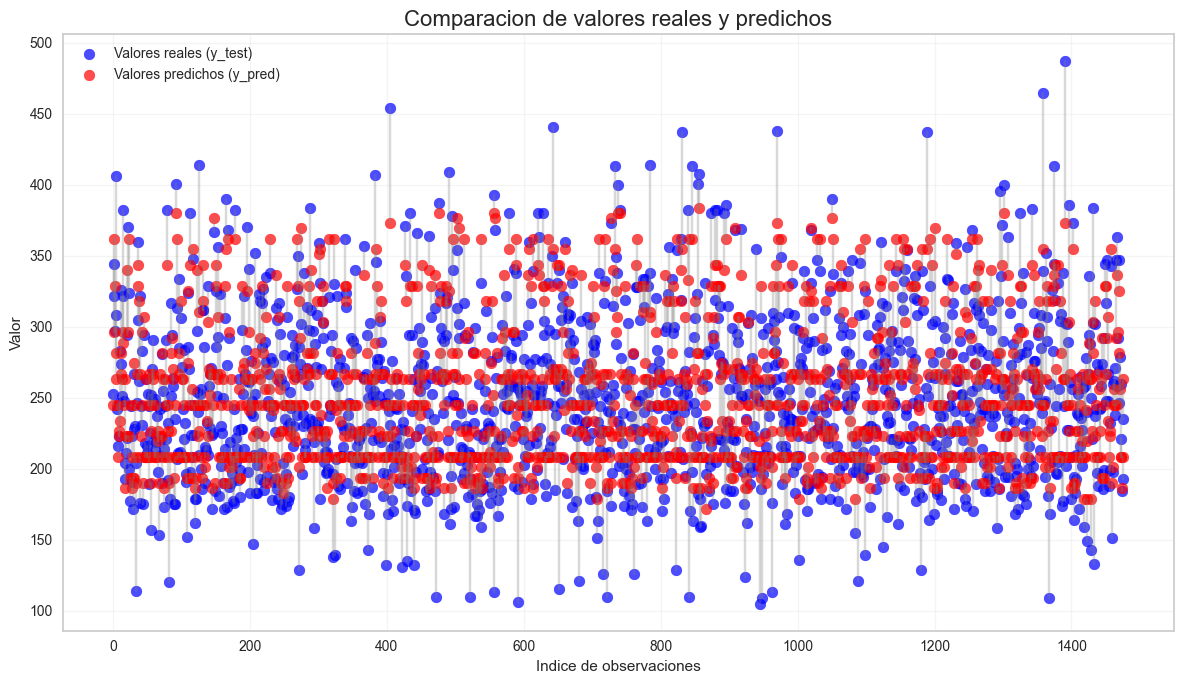

In [ ]:
plt.figure(figsize=(12, 7))

# Convertir a arrays numpy si no lo estan ya
Y_test_array = np.array(Y_test).flatten()
Y_pred_array = np.array(Y_pred).flatten()

# Crear un rango de indices
index = np.arange(len(Y_test_array))

# Graficar
plt.scatter(
    index, Y_test_array, color="blue", alpha=0.7, label="Valores reales (y_test)", s=60
)
plt.scatter(
    index,
    Y_pred_array,
    color="red",
    alpha=0.7,
    label="Valores predichos (y_pred)",
    s=60,
)

# Conextar los puntos
for i in range(len(Y_test_array)):
    plt.plot(
        [index[i], index[i]], [Y_test_array[i], Y_pred_array[i]], "gray", alpha=0.3
    )

# Personalizacion
plt.title("Comparacion de valores reales y predichos", fontsize=16)
plt.xlabel("Indice de observaciones")
plt.ylabel("Valor")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [40]:
my_dict = {"Actual": Y_test, "pred": Y_pred, "residual": Y_test - Y_pred}
compare = pd.DataFrame(my_dict)
compare

,Actual,pred,residual
7261,253,244.893111,8.106889
4489,344,296.150160,47.849840
1539,322,362.052081,-40.052081
3532,297,329.101120,-32.101120
6418,308,281.505289,26.494711
...,...,...,...
7185,221,208.280933,12.719067
1740,260,208.280933,51.719067
4609,184,186.313626,-2.313626
1844,235,263.199200,-28.199200


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


def train_val(Y_train, Y_train_pred, Y_test, Y_pred, i):
    scores = {
        i + "_train": {
            "R2": r2_score(Y_train, Y_train_pred),
            "mae": mean_absolute_error(Y_train, Y_train_pred),
            "mse": mean_squared_error(Y_train, Y_train_pred),
            "rmse": np.sqrt(mean_squared_error(Y_train, Y_train_pred)),
        },
        i + "_test": {
            "R2": r2_score(Y_test, Y_pred),
            "mae": mean_absolute_error(Y_test, Y_pred),
            "mse": mean_squared_error(Y_test, Y_pred),
            "rmse": np.sqrt(mean_squared_error(Y_test, Y_pred)),
        },
    }
    return pd.DataFrame(scores)

In [43]:
slr_score = train_val(Y_train, Y_train_pred, Y_test, Y_pred, "linear")
slr_score

,linear_train,linear_test
R2,0.724528,0.723812
mae,23.374987,22.927177
mse,941.716358,949.985253
rmse,30.687397,30.821831
